<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab


## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

If you're interested, try a variety of response variables.  We start with **MEDV** (the `.target` attribute from the dataset load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
# Create 1 DataFrame, X features matrix (rest of data, body and header)
# Create 1 array holding the target values, y response vector
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [4]:
# A: Data is clean, no need to concat the DataFrames to check
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

In [5]:
# Select 4 variables/predictors: CRIM, NOX, B, LSTAT
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [20]:
#need to import the train-test-split
from sklearn.model_selection import train_test_split

predictors = ['CRIM', 'NOX', 'B', 'LSTAT']
X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.5, random_state=8)

In [21]:
#THIS IS STANDARD RECIPE TO FOLLOW FOR LINEAR REGRESSION! Initialize, fit, score

# Import the class
from sklearn.linear_model import LinearRegression

# Instantiate the model
lr = LinearRegression()

# Train the model on the training set
lr.fit(X_train, y_train)

# Returns the R-squared result from testing set
lr.score(X_test, y_test)

0.5531562767383544

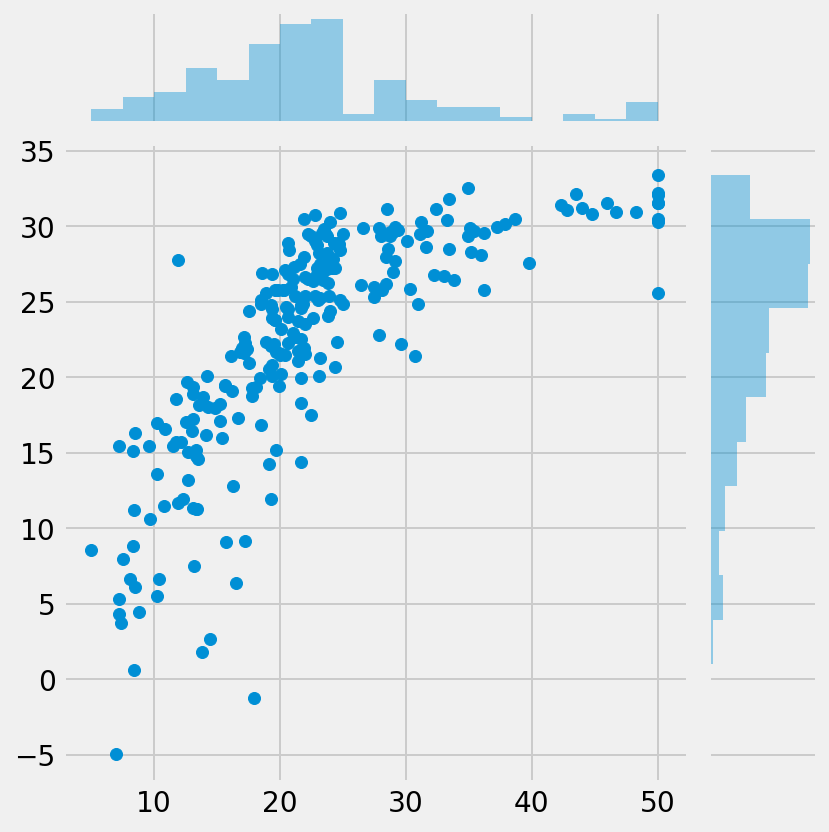

In [22]:
y_pred = lr.predict(X_test)
sns.jointplot(y_test, y_pred);

### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [ ]:
# As the training set increases in size, the R-squared value decreases:
# 50/50 split results in 55.32% variation
# 70/30 split results in 49.62% variation
# 90/10 split results in 48.99% variation

In [7]:
# A: 70/30 split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

predictors = ['CRIM', 'NOX', 'B', 'LSTAT']

X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.7, random_state=8)

# Initialize, fit and score under newly initialized namespace
lr2 = LinearRegression()
lr2.fit(X_train,y_train)
lr2.score(X_test, y_test)

0.49617713251624035

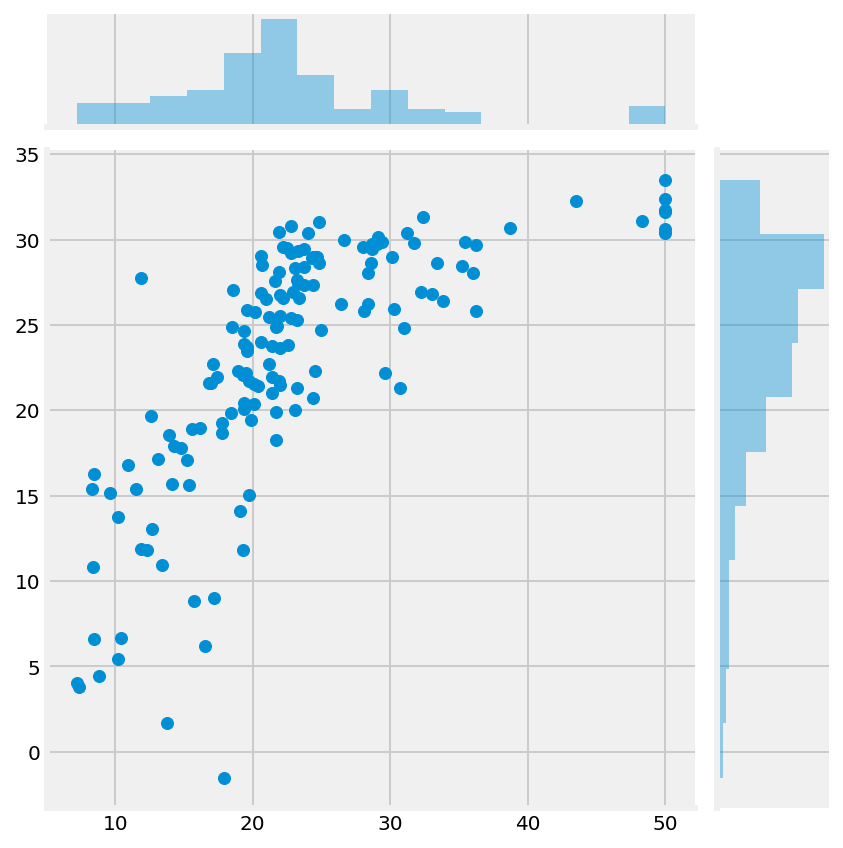

In [9]:
y_pred = lr2.predict(X_test)
sns.jointplot(y_test, y_pred);

In [10]:
# A: 90/10 split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

predictors = ['CRIM', 'NOX', 'B', 'LSTAT']

X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.9, random_state=8)

# Initialize, fit and score under newly initialized namespace
lr3 = LinearRegression()
lr3.fit(X_train,y_train)
lr3.score(X_test, y_test)

0.4899085265061925

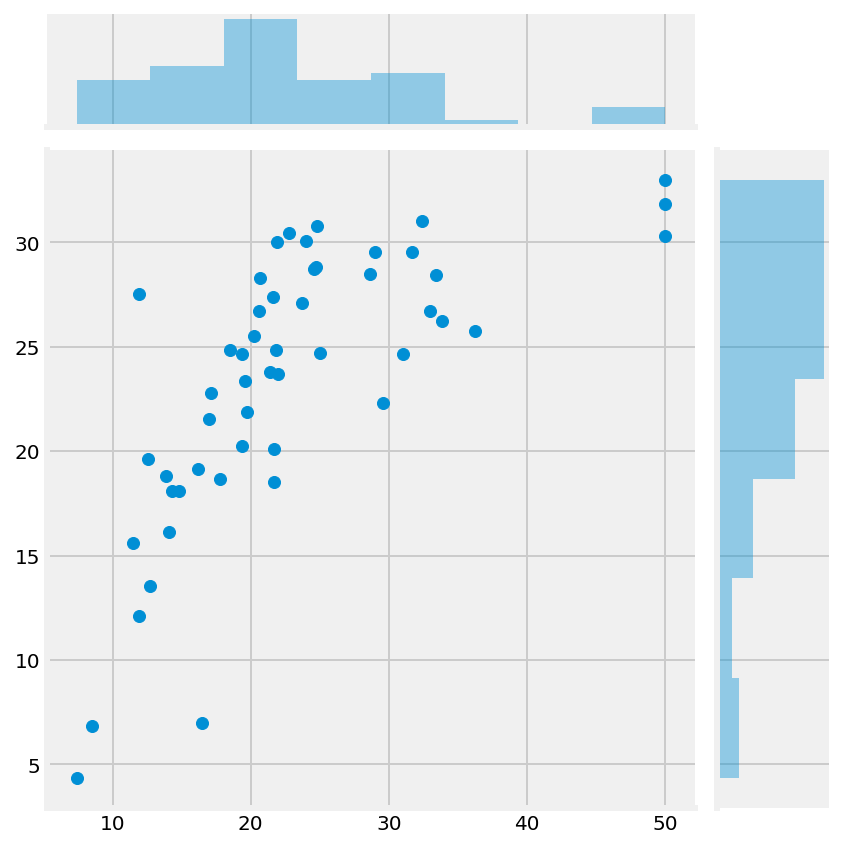

In [11]:
y_pred = lr3.predict(X_test)
sns.jointplot(y_test, y_pred);

### 4. Try K-Folds cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [7]:
# A:

In [13]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
predictors = ['CRIM', 'NOX', 'B', 'LSTAT']

In [14]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# iterate through folds 5-10
for folds in range(5,11):
    print('------------------------------------\n')
    print('K: {}'.format(folds))
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, X[predictors], y, cv=folds)
    print("Cross-validated scores: {}".format(scores))
    print("Mean CV R2: {}".format(np.mean(scores)))
    print('Std CV R2: {}'.format(np.std(scores)))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X[predictors], y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print("Cross-Predicted R2: {}".format(r2))

------------------------------------

K: 5
Cross-validated scores: [ 0.29107506  0.5489439   0.08362083  0.41839665 -0.00685559]
Mean CV R2: 0.26703616790842605
Std CV R2: 0.20572686516208372
Cross-Predicted R2: 0.4870062651536543
------------------------------------

K: 6
Cross-validated scores: [0.17781993 0.54507299 0.12000189 0.25739423 0.38076373 0.10808938]
Mean CV R2: 0.2648570270151643
Std CV R2: 0.15553435121192147
Cross-Predicted R2: 0.4865047806617122
------------------------------------

K: 7
Cross-validated scores: [ 0.28518907  0.40869068  0.28161764  0.04039661 -0.44138824  0.40976284
  0.19267244]
Mean CV R2: 0.16813443511874407
Std CV R2: 0.2754914488644909
Cross-Predicted R2: 0.4751113479442307
------------------------------------

K: 8
Cross-validated scores: [ 0.3791454   0.22735162  0.53805695  0.20125271  0.1663363   0.15300519
 -0.99432986  0.1257991 ]
Mean CV R2: 0.09957717321961965
Std CV R2: 0.4332606974257349
Cross-Predicted R2: 0.48982312274080586
----------

### 5. [Bonus] optimize the $R^2$ score

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [15]:
# A:
from itertools import combinations

In [16]:
combs = []
for i in range(1, len(X.columns)+1):
    for c in combinations(X.columns.tolist(), i):
        combs.append(c)

In [18]:
#linreg = LinearRegression()

#R2_results = {}
#for i,c in enumerate(combs):
    #if (i % 250) == 0:
        #print(i)
        
    #subX = X[list(c)]
    #R2_results[c] = np.mean(cross_val_score(linreg, subX, y))

### 5.1 Can you explain what could be wrong with this approach?

In [9]:
# A:

### 6. [Bonus] Explore another target variable and practice `patsy` formulas

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

**Try out using patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and pearson scores.*

In [10]:
import patsy

# A: